<a href="https://colab.research.google.com/github/kjxeez/machine-learning/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1


### Дисциплина: Методы машинного обучения

##### Студент:  Акопян Изабелла Арменовна
##### Группа:   НБИбд-01-20

## Москва 2023
***

### Вариант №12

#### __Текст задания__:
В соответствии с индивидуальным заданием, указанным в записной книжке команды, выполните следующие работы:

1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую и зависимую переменные. Вычислите матрицу корреляции признаков и определите пары признаков с наиболее низкой и наиболее высокой корреляцией.

2. Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием, подписывая оси и рисунок.

3. Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети с одним нейроном. Вычислите и сравните значения показателей качества  R2  двух подходов.

4. Постройте диаграмму рассеяния для независимого и зависимого признаков и изобразите линии двух построенных парных регрессий, подписывая оси и рисунок и создавая легенду.

5. Разбейте набор признаков на обучающую и контрольную выборки. Создайте и адаптируйте нормализующий слой Tensorflow для всех признаков набора данных (за исключением зависимого признака).

6. Используя созданный нормализующий слой, постройте регресоры на базе следующих моделей множественной регрессии:

линейной регрессии
гребневой регрессии (L2)
лассо регрессии (L1)
7. Определите на контрольной выборке модель множественной регрессии с наиболее высоким качеством по показателю, указанному в индивидуальном задании, среди построенных моделей.

8. Для лучшего регрессора визуализируйте кривые обучения (в зависимости от эпохи обучения).

9. Определите медианные значения признаков (кроме независимого и зависимого признаков) и для построенных медианных значений визуализируйте на плоскости с независимым признаком в качестве оси абсцисс и зависимым признаком в качестве оси ординат точки тестовой выборки и линии (графики) различных моделей множественной регрессии разными цветами. Подпишите оси и создайте легенду и заголовок для рисунка.


------------------------
Лабораторная работа 1 – Вариант 12 

1. Набор данных: wine_quality 

2. Независимая переменная: features/density 

3. Зависимая переменная: features/fixed acidity 

4. Визуализация для независимой переменной – эмпирическая плотность распределения 

5. Визуализация для зависимой переменной – столбчатая диаграмма 

6. Показатель качества регрессии – R^2 (коэффициент детерминации) 

Решение ниже


__Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую и зависимую переменные.__

In [233]:
import tensorflow_datasets as tfds

In [234]:
ds = tfds.load("wine_quality", split='train') 

ds

<_PrefetchDataset element_spec={'features': {'alcohol': TensorSpec(shape=(), dtype=tf.float32, name=None), 'chlorides': TensorSpec(shape=(), dtype=tf.float32, name=None), 'citric acid': TensorSpec(shape=(), dtype=tf.float32, name=None), 'density': TensorSpec(shape=(), dtype=tf.float32, name=None), 'fixed acidity': TensorSpec(shape=(), dtype=tf.float32, name=None), 'free sulfur dioxide': TensorSpec(shape=(), dtype=tf.float32, name=None), 'pH': TensorSpec(shape=(), dtype=tf.float32, name=None), 'residual sugar': TensorSpec(shape=(), dtype=tf.float32, name=None), 'sulphates': TensorSpec(shape=(), dtype=tf.float64, name=None), 'total sulfur dioxide': TensorSpec(shape=(), dtype=tf.float32, name=None), 'volatile acidity': TensorSpec(shape=(), dtype=tf.float32, name=None)}, 'quality': TensorSpec(shape=(), dtype=tf.int32, name=None)}>

In [235]:
df = tfds.as_dataframe(ds)
df.head()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32,5
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27,6
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43,4
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41,6
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34,6


In [236]:
df.drop(columns=['quality'],inplace=True) #оценка качества может быть от 0 до 10 всего
df.head()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34


__Вычислите матрицу корреляции признаков и определите пары признаков с наиболее низкой и наиболее высокой корреляцией.__

In [237]:
corr_matrix = df.corr()
corr_matrix

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity
features/alcohol,1.000000,-0.360189,-0.075729,-0.780138,-0.120881,-0.250104,0.121432,-0.450631,-0.017433,-0.448892,0.067718
features/chlorides,-0.360189,1.000000,0.114364,0.257211,0.023086,0.101392,-0.090439,0.088685,0.016763,0.198910,0.070512
features/citric acid,-0.075729,0.114364,1.000000,0.149503,0.289181,0.094077,-0.163748,0.094212,0.062331,0.121131,-0.149472
features/density,-0.780138,0.257211,0.149503,1.000000,0.265331,0.294210,-0.093592,0.838967,0.074493,0.529881,0.027114
features/fixed acidity,-0.120881,0.023086,0.289181,0.265331,1.000000,-0.049396,-0.425858,0.089021,-0.017143,0.091070,-0.022697
features/free sulfur dioxide,-0.250104,0.101392,0.094077,0.294210,-0.049396,1.000000,-0.000618,0.299098,0.059217,0.615501,-0.097012
features/pH,0.121432,-0.090439,-0.163748,-0.093592,-0.425858,-0.000618,1.000000,-0.194133,0.155951,0.002321,-0.031915
features/residual sugar,-0.450631,0.088685,0.094212,0.838967,0.089021,0.299098,-0.194133,1.000000,-0.026664,0.401439,0.064286
features/sulphates,-0.017433,0.016763,0.062331,0.074493,-0.017143,0.059217,0.155951,-0.026664,1.000000,0.134562,-0.035728
features/total sulfur dioxide,-0.448892,0.198910,0.121131,0.529881,0.091070,0.615501,0.002321,0.401439,0.134562,1.000000,0.089261


In [238]:
import seaborn as sns

<Axes: >

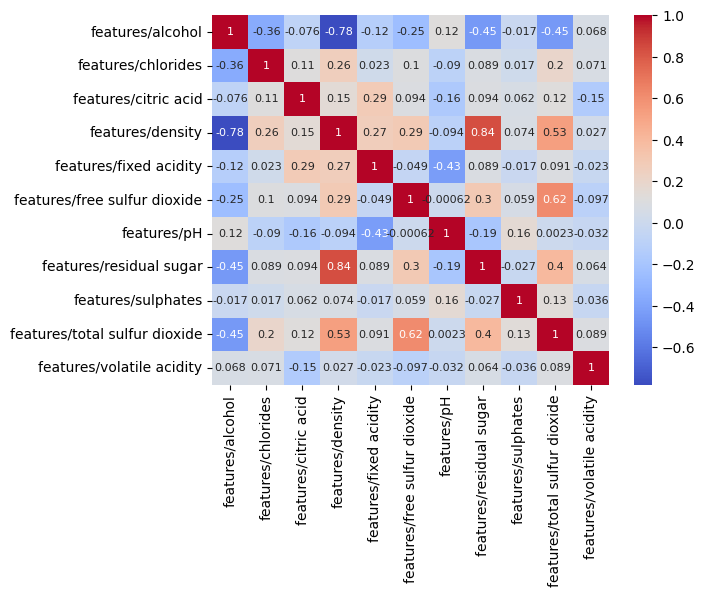

In [239]:
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={'size':8}) #для визуализации, так проще


Видим, тут плотность зависит от спирта (чем больше спирта, тем меньше плотность (-0.78)) - по чеддоку корреляция высокая

А диоксид серы (sulfur acidity) можно считать не зависит от меры кислотности (pH) - по Чеддоку вообще нет корреляции

__Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием, подписывая оси и рисунок.__

In [240]:
import matplotlib.pyplot as plt

y = features/fixed acidity 

x = features/density 

Визуализация для независимой переменной – эмпирическая плотность распределения 

Визуализация для зависимой переменной – столбчатая диаграмма 

__Эмпирическая (выборочная) плотность распределения (PDF) для x__

In [241]:
y = df['features/fixed acidity']
x = df['features/density']


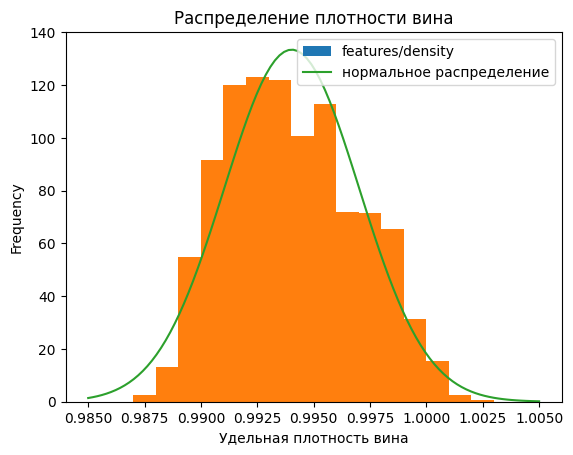

In [243]:
import numpy as np
x.plot.hist(density=True, range=[0.985, 1.005], bins = 20).set_xlabel('Удельная плотность вина')
counts, bins, _ = plt.hist(x, density=True, range=[0.985, 1.005], bins=20)
mu = np.mean(x)
sigma = np.std(x)
x_line = np.linspace(bins[0], bins[-1], 100)
y_line = (1/np.sqrt(2*np.pi*sigma**2)) * np.exp(-((x_line-mu)**2)/(2*sigma**2))
plt.title('Распределение плотности вина')
plt.plot(x_line, y_line, label = 'нормальное распределение') 
plt.legend()

__Столбчатая диаграмма для y__

[Text(0, 0.5, 'Фиксированная кислотность вина'), Text(0.5, 0, 'Индекс вина')]

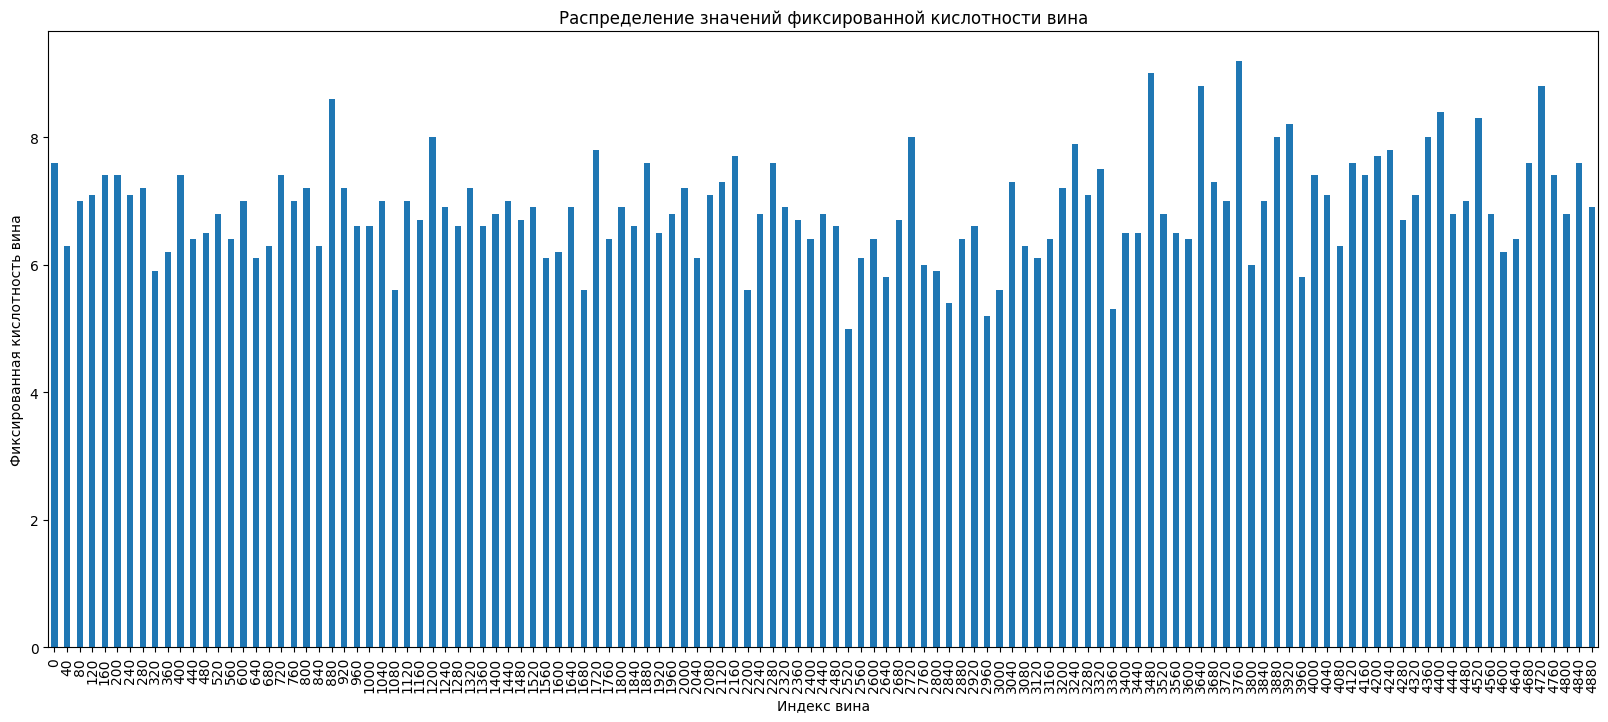

In [244]:
df[::40]['features/fixed acidity'].plot.bar(title='Распределение значений фиксированной кислотности вина', figsize=(20,8)).set(ylabel='Фиксированная кислотность вина', xlabel = 'Индекс вина')

__Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети с одним нейроном. Вычислите и сравните значения показателей качества R2 двух подходов.__

__Показатель качества регрессии – R^2 (коэффициент детерминации)__

In [245]:
import numpy as np
import pandas as pd

In [246]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [247]:
x = np.array(x)
y = np.array(y)

In [248]:
q1, q3 = np.percentile(x, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

In [249]:
x_filtered = x[(x > lower_bound) & (x < upper_bound)]
y_filtered = y[(x > lower_bound) & (x < upper_bound)]
x=x_filtered
y=y_filtered

In [250]:
#коэффициент регрессии
a = (len(x)*sum(x*y) - sum(x)*sum(y)) / (len(x)*sum(x**2) - (sum(x))**2)

#коэффициент смещения
b = (sum(y) - a*sum(x)) / len(x)
a, b

(77.95226241079025, -70.63097424534573)

In [251]:
x_test = x
y_pred = a*x_test + b

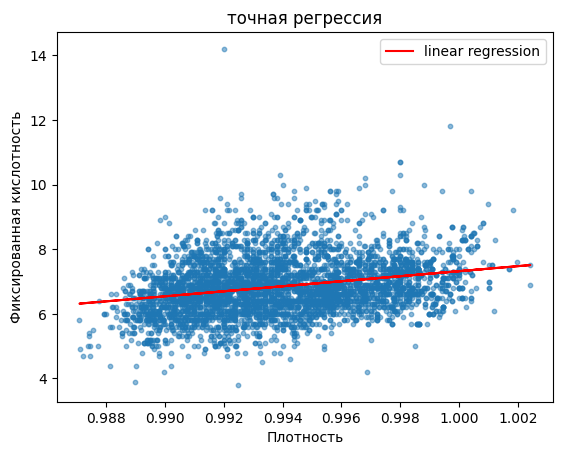

In [256]:
import matplotlib.pyplot as plt

# Добавляем точки на график
fig, ax = plt.subplots()
ax.scatter(x, y,s=10, alpha=0.5)
# Строим регрессионную прямую
plt.plot(x, y_pred, c='red', label = 'linear regression')

# Добавляем подписи осей
ax.set_xlabel('Плотность')
ax.set_ylabel('Фиксированная кислотность')
plt.title('точная регрессия')
ax.legend()
# Отображаем график
plt.show()

In [253]:
y_mean = np.mean(y)
y_pred = a*x + b
ssr = sum((y - y_pred)**2)
sst = sum((y - y_mean)**2)
r2 = 1 - ssr/sst

print("R^2 точного подхода = ", r2)

R^2 точного подхода =  0.07168959045915091


In [254]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [255]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
# Нормализующий слой для всех признаков
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(1,))
# Адаптация нормализующего слоя на обучающих данных
feature_normalizer.adapt(x)

Далее создадим модель парной линейной регрессии с одним нейроном:

In [95]:
import tensorflow as tf
feature_model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(units=1)
])
feature_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [96]:
# Компиляция модели
feature_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [97]:
# Обучение модели
history=feature_model.fit(x, y, epochs=10, verbose=0)
history

123/123 [==============================] - 1s 4ms/step


Text(0.5, 1.0, 'Регрессия')

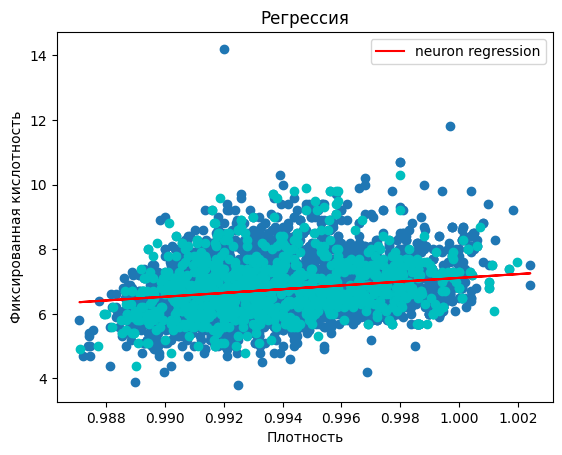

In [259]:
fig, ax = plt.subplots()
ax.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color="c")
plt.plot(x_train, feature_model.predict(x_train), color='r', label = 'neuron regression')
ax.set_ylabel('Фиксированная кислотность')
ax.set_xlabel('Плотность')
ax.legend()
plt.title("Регрессия")


In [260]:
y_predict = feature_model.predict(x_test)
y_predict

31/31 [==============================] - 0s 1ms/step


array([[6.7516103],
       [6.7691283],
       [6.611464 ],
       [6.6278157],
       [6.8450437],
       [6.7048936],
       [6.6348224],
       [6.8450437],
       [6.9618316],
       [6.798327 ],
       [6.611464 ],
       [6.5851855],
       [6.6704426],
       [6.599783 ],
       [6.915115 ],
       [6.5098586],
       [6.657011 ],
       [6.915115 ],
       [7.101981 ],
       [6.9186196],
       [6.963001 ],
       [6.6932163],
       [6.624311 ],
       [6.65234  ],
       [6.614969 ],
       [6.539054 ],
       [6.669858 ],
       [6.508689 ],
       [6.764457 ],
       [7.119499 ],
       [6.5507345],
       [6.9682565],
       [7.0196443],
       [6.54723  ],
       [6.872488 ],
       [7.0027075],
       [6.862561 ],
       [6.8216853],
       [6.4648924],
       [6.5635815],
       [6.562997 ],
       [7.028986 ],
       [6.5016823],
       [6.766793 ],
       [6.661682 ],
       [6.993366 ],
       [6.6920505],
       [6.5881057],
       [6.8684015],
       [6.591026 ],


In [261]:
from sklearn.metrics import r2_score
def check_R2(y_test, y_predict):
  return f'R^2 : {r2_score(y_test, y_predict)}'


После построения модели настроим процедуру обучения с помощью метода compile(). Наиболее важными аргументами для компиляции являются функция потерь и оптимизатор, поскольку они определяют, что будет оптимизировано (mean_absolute_error) и как (оптимизатор Adam).

In [262]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.649260,0.663046,95
96,0.626878,0.638186,96
97,0.628152,0.641958,97
98,0.626642,0.635753,98
99,0.629057,0.650002,99


После настройки обучения используем метод fit() для выполнения обучения:

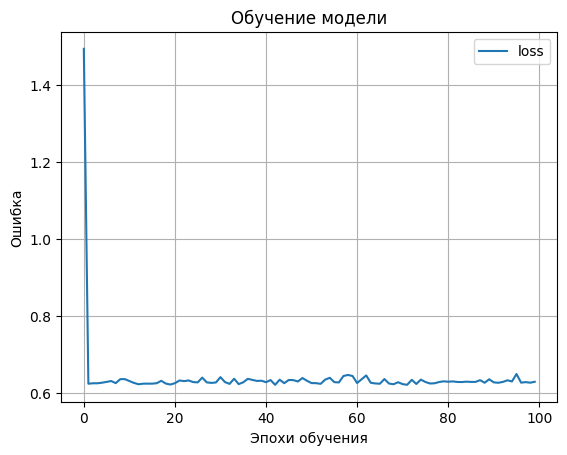

In [264]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.xlabel('Эпохи обучения')
    plt.ylabel('Ошибка')
    plt.legend()
    plt.grid(True)
    plt.title("Обучение модели")

plot_loss(history)

точный метод получился лучше учитывая R^2

__Постройте диаграмму рассеяния для независимого и зависимого признаков и изобразите линии двух построенных парных регрессий, подписывая оси и рисунок и создавая легенду.__

123/123 [==============================] - 0s 1ms/step


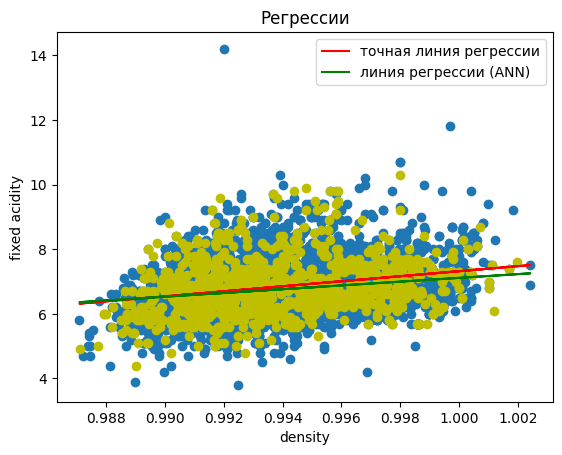

In [265]:
fig, ax = plt.subplots()

ax.scatter(x_train, y_train)
ax.scatter(x_test, y_test, c='y')
ax.plot(x, y_pred, c='red', label='точная линия регрессии')
ax.plot(x_train, feature_model.predict(x_train), color='g', label='линия регрессии (ANN)');
ax.set_xlabel('density')
ax.set_ylabel('fixed acidity')
plt.title('Регрессии')
ax.legend();


R^2 точного подхода =  0.07027949018521595

In [266]:
r2_score(y_test, feature_model.predict(x_test))


31/31 [==============================] - 0s 1ms/step


0.045000985654769066

__Множественная регрессия__

In [267]:
linear_model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(units=1)
])

In [268]:
linear_model.predict(x_train)

123/123 [==============================] - 0s 1ms/step


array([[ 0.80390275],
       [ 0.28896248],
       [-0.98409665],
       ...,
       [ 0.7896006 ],
       [-0.9268669 ],
       [-0.49059895]], dtype=float32)

При вызове модели будут построены ее весовые матрицы и смещения:

In [269]:
linear_model.layers[1].kernel

<tf.Variable 'dense_28/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-1.0363433]], dtype=float32)>

In [270]:
linear_model.layers[1].bias

<tf.Variable 'dense_28/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

In [279]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_absolute_error')

In [280]:
%%time
history = linear_model.fit(
    x_train, y_train, 
    epochs=100,
    # подавляем вывод
    verbose=0,
    # проверка (валидация) на 20% обучающих данных
    validation_split = 0.2)

CPU times: user 20.4 s, sys: 1.19 s, total: 21.6 s
Wall time: 20.6 s


Использование большего числа признаков обеспечивает меньшую ошибку обучения и валидации, чем модель парной регрессии:

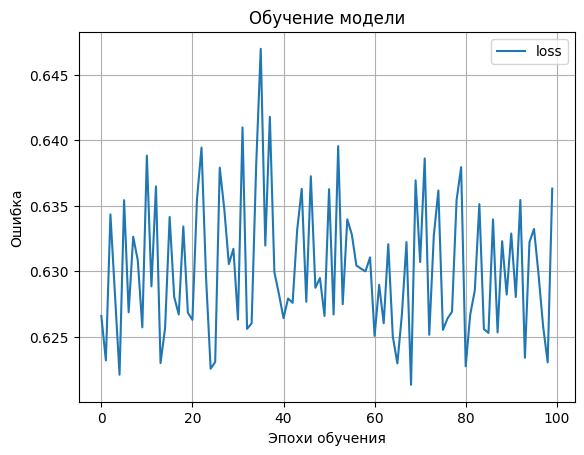

In [281]:
plot_loss(history)

In [282]:
from sklearn. linear_model import Ridge
from sklearn. linear_model import RidgeCV
from sklearn. model_selection import RepeatedKFold

Аналогично, для гребневой регрессии и лассо регрессии, нам нужно использовать соответствующие слои регуляризации kernel_regularizer


In [283]:

#Гребневая регрессия:
ridge_model = tf.keras.Sequential([
 feature_normalizer,
 tf.keras.layers.Dense(units=1, 
 kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))
])
ridge_model.compile(
 optimizer=tf.optimizers.Adam(learning_rate=0.25),
 loss='mean_absolute_error')
history2 = ridge_model.fit(
 x_train, y_train,
 epochs=100,
 verbose=0,
 validation_split = 0.2)



In [284]:
#Лассо регрессия:
lasso_model = tf.keras.Sequential([
 feature_normalizer,
 tf.keras.layers.Dense(units=1, 
 kernel_regularizer=tf.keras.regularizers.L1(l1=0.01))
])
lasso_model.compile(
 optimizer=tf.optimizers.Adam(learning_rate=0.25),
 loss='mean_absolute_error')
history1 = lasso_model.fit(
 x_train, y_train,
 epochs=100,
 verbose=0,
 validation_split = 0.2)


In [285]:
r2_score(y_test, linear_model.predict(x_test)), r2_score(y_test, lasso_model.predict(x_test)), r2_score(y_test, ridge_model.predict(x_test))

31/31 [==============================] - 0s 2ms/step


(0.04495475906055979, 0.022648320242252162, -0.05152772958436036)

__наилучшей получилась линейная обычная модель (учитывая коэффициент детерминации)__

123/123 [==============================] - 0s 1ms/step


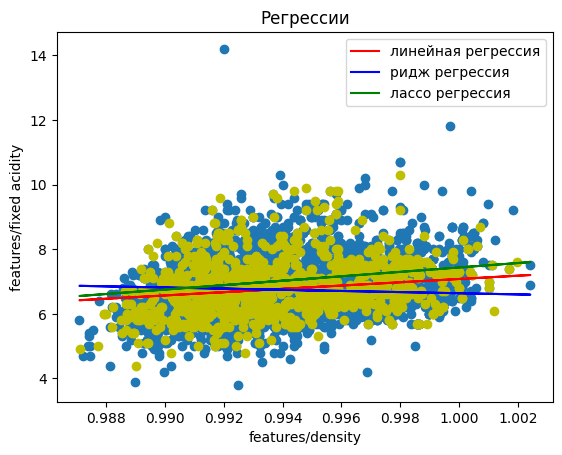

In [286]:
fig, ax = plt.subplots()
ax.scatter(x_train, y_train)
ax.scatter(x_test, y_test, c='y')
ax.plot(x_train, linear_model.predict(x_train), color='r', label='линейная регрессия');
ax.plot(x_train, ridge_model.predict(x_train), color='b', label='ридж регрессия');
ax.plot(x_train, lasso_model.predict(x_train), color='g', label='лассо регрессия');
ax.set_xlabel('features/density')
ax.set_ylabel('features/fixed acidity')
plt.title('Регрессии')
ax.legend();

Для лучшего регрессора визуализируйте кривые обучения (в зависимости от эпохи
обучения)

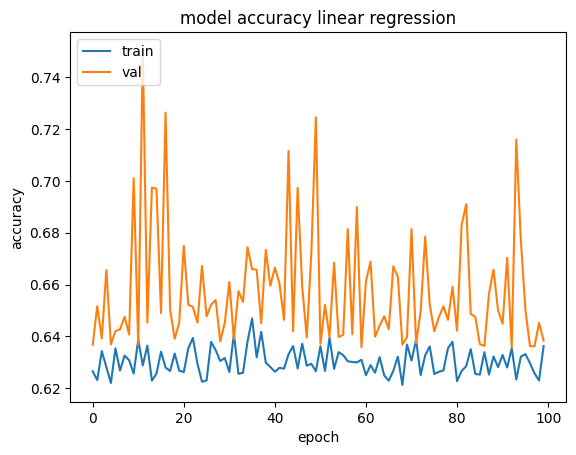

In [289]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy linear regression')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Определите медианные значения признаков (кроме независимого и зависимого
признаков) и для построенных медианных значений визуализируйте на плоскости с
независимым признаком в качестве оси абсцисс и зависимым признаком в
качестве оси ординат точки тестовой выборки и линии (графики) различных
моделей множественной регрессии разными цветами. Подпишите оси и создайте
легенду и заголовок для рисунка.

In [290]:
new_data = df.drop(['features/density','features/fixed acidity'],axis=1).median()
new_data

features/alcohol                  10.400
features/chlorides                 0.043
features/citric acid               0.320
features/free sulfur dioxide      34.000
features/pH                        3.180
features/residual sugar            5.200
features/sulphates                 0.470
features/total sulfur dioxide    134.000
features/volatile acidity          0.260
dtype: float64

In [291]:
predictions_linear = linear_model.predict(new_data)
predictions_l1 = lasso_model.predict(new_data)
predictions_l2 = ridge_model.predict(new_data)

1/1 [==============================] - 0s 56ms/step


31/31 [==============================] - 0s 2ms/step


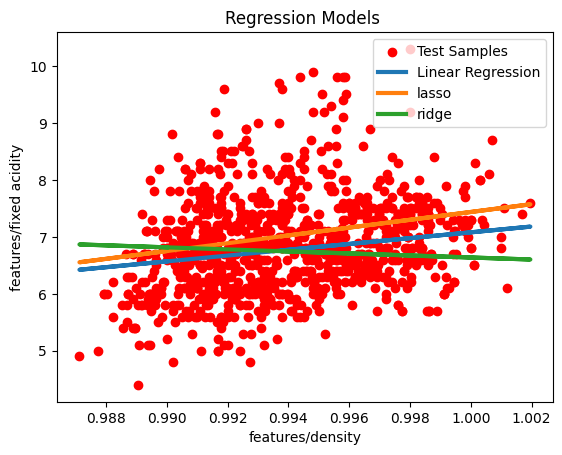

In [293]:
fig, ax = plt.subplots()
ax.scatter(x_test, y_test, label='Test Samples', color='red')
plt.plot(x_test, linear_model.predict(x_test), label='Linear Regression', linewidth=3)
plt.plot(x_test, lasso_model.predict(x_test), label='lasso', linewidth=3)
plt.plot(x_test, ridge_model.predict(x_test), label='ridge', linewidth=3)
plt.title('Regression Models ')
ax.set_xlabel('features/density')
ax.set_ylabel('features/fixed acidity')
plt.legend(loc='best')
plt.show()